In [35]:
import json
import pandas as pd
import numpy as np

In [36]:
data0 = pd.read_csv('taipei job vacancy.csv')
data0.head()

,公司名稱,職缺,工作內容,職缺數,薪資,活動時間,活動地點
0,瓦城泰統股份有限公司,外場店經理,1.依集團營運政策，標準作業程序執行營運業績管理。\n 2.負責與集團間的溝通與聯繫。\n ...,10,"月薪\n 50,000-60,000元",0111/06/02,信義站
1,瓦城泰統股份有限公司,外場主管,1.負責外場人力調配，分配人員工作，指導其工作方法，並考核其績效。\n 2.負責規劃並控管採...,10,"月薪\n 31,000-40,000元",0111/06/02,信義站
2,瓦城泰統股份有限公司,外場正職人員\n (實習生可),1.客人接待、引導、餐具擺設、餐點介紹、餐廳環境維護等餐飲服務工作\n 2.餐廳環境清潔與維...,10,"月薪28,000元起",0111/06/02,信義站
3,瓦城泰統股份有限公司,外場兼職人員,1.客人接待、引導、餐具擺設、餐點介紹、餐廳環境維護等餐飲服務工作\n 2.餐廳環境清潔與維...,15,時薪$175元起,0111/06/02,信義站
4,瓦城泰統股份有限公司,內場正職廚務人員\n (實習生可),1.負責洗、剝、削、切各種食材，以完成烹飪的前置工作。\n 2.協助廚師測量食材的容量與重量...,15,"月薪\n 32,000-40,000元",0111/06/02,信義站


In [37]:
data0['seg'] = ""
data0.head()

,公司名稱,職缺,工作內容,職缺數,薪資,活動時間,活動地點,seg
0,瓦城泰統股份有限公司,外場店經理,1.依集團營運政策，標準作業程序執行營運業績管理。\n 2.負責與集團間的溝通與聯繫。\n ...,10,"月薪\n 50,000-60,000元",0111/06/02,信義站,
1,瓦城泰統股份有限公司,外場主管,1.負責外場人力調配，分配人員工作，指導其工作方法，並考核其績效。\n 2.負責規劃並控管採...,10,"月薪\n 31,000-40,000元",0111/06/02,信義站,
2,瓦城泰統股份有限公司,外場正職人員\n (實習生可),1.客人接待、引導、餐具擺設、餐點介紹、餐廳環境維護等餐飲服務工作\n 2.餐廳環境清潔與維...,10,"月薪28,000元起",0111/06/02,信義站,
3,瓦城泰統股份有限公司,外場兼職人員,1.客人接待、引導、餐具擺設、餐點介紹、餐廳環境維護等餐飲服務工作\n 2.餐廳環境清潔與維...,15,時薪$175元起,0111/06/02,信義站,
4,瓦城泰統股份有限公司,內場正職廚務人員\n (實習生可),1.負責洗、剝、削、切各種食材，以完成烹飪的前置工作。\n 2.協助廚師測量食材的容量與重量...,15,"月薪\n 32,000-40,000元",0111/06/02,信義站,


In [38]:
# 文字探勘
# 需先下載 jieba modle 查過很多方法，最終成功下載方式為 
# 1.進入Anaconda.org 查詢 jieba 
# 2.開啟Anaconda prompt 輸入剛剛查的其中一串程式碼 => 成功

import jieba
import jieba.analyse
from collections import Counter

In [39]:
# 測試結巴功能
documents = ["我是國立臺灣師範大學科技系學生"]
# 精確模式
for sentence in documents:
    seg_list = jieba.cut(sentence) # 斷詞
    print('/'.join(seg_list))

我/是/國立臺灣師範大學/科技系/學生


In [40]:
# 測試結巴功能
jieba.load_userdict('./userdict.txt') # userdict 斷詞字典(自己建立)

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/國立臺灣師範大學/科技系/學生


In [41]:
# jieba.analyse.set_stop_words('stopwords.txt') #stopwords 不要的字(自己建立)

# jieba.load_userdict('./userdict.txt') #userdict 斷詞字典(自己建立)

index = 0
for documents in data0['職缺']: # data0中的職缺欄位
    seg_list = jieba.analyse.extract_tags(documents, 150) # 150 為前150個權重最高的單詞
    #seg_list = jieba.lcut(documents)  (已建立斷詞字典可不用這行)
    data0['seg'].iloc[index] = seg_list
    index += 1

In [42]:
data0['seg']

0                [外場, 店經理]
1                 [外場, 主管]
2        [外場, 正職, 人員, 實習生]
3             [外場, 兼職, 人員]
4      [內場, 正職, 廚務人員, 實習生]
              ...         
144              [軟體, 工程師]
145           [人資, 專員, 招募]
146           [員工, 專員, 福利]
147               [倉管, 人員]
148               [門市, 兼職]
Name: seg, Length: 149, dtype: object

In [43]:
type(data0['seg']) # 確認資料型態

pandas.core.series.Series

In [44]:
data0_seg_list = data0['seg'].tolist() # 將資料型態轉為list
print(type(data0_seg_list))
print(data0_seg_list)

<class 'list'>
[['外場', '店經理'], ['外場', '主管'], ['外場', '正職', '人員', '實習生'], ['外場', '兼職', '人員'], ['內場', '正職', '廚務人員', '實習生'], ['資深', '服務', '專員'], ['資深', '廚務', '專員'], ['台服', '外場', '專員'], ['餐廚', '廚務', '專員', '助手'], ['廚房', '洗滌人員'], ['停車場', '早班', '管理'], ['中班', '停車場', '管理'], ['停車場', '晚班', '管理'], ['內勤', '行政助理'], ['客戶', '服務', '含銷售', '推薦', '專員'], ['客戶', '服務', '專員'], ['電話', '行銷', '專員'], ['軟體', '開發', '工程師'], ['照顧', '服務員', '居家'], ['收銀', '專員', '客服'], ['營業', '銷售', '專員'], ['社區', '開發', '專員'], ['裝修', '專案', '管理'], ['外場', '正職', '人員'], ['儲備', '幹部', '值班'], ['襄理', '大廳', '見習'], ['廚藝', '計時'], ['湖區', '捷運車', '清潔維護', '人員'], ['湖區', '捷運車', '廁所', '清潔', '人員'], ['車司機', '垃圾'], ['財務', '課員'], ['外場', '大廳', '主任'], ['廚務長'], ['外場', '領班'], ['外場', '服務', '專員'], ['內場', '廚務', '專員'], ['兼職', '外場', '人員'], ['兼職', '內場', '人員'], ['儲備', '幹部', '值班'], ['襄理', '大廳', '見習'], ['廚藝', '計時'], ['營業員'], ['調度', '計時', '早班'], ['調度', '計時', '晚班'], ['調度', '計時', '夜班'], ['維護', '計時'], ['維護', '專員', '日班', '晚班'], ['調度', '專員', '日班', '晚班', '物流'], ['調度', '專員', '夜班', '

In [45]:
flat = [x for data0list in data0_seg_list for x in data0list] # 迴圈寫法
diction = Counter(flat) # dict(字典) 的子類別，用來計算可雜湊物件的數量
diction

Counter({'外場': 19,
         '店經理': 1,
         '主管': 1,
         '正職': 10,
         '人員': 32,
         '實習生': 2,
         '兼職': 13,
         '內場': 8,
         '廚務人員': 1,
         '資深': 2,
         '服務': 6,
         '專員': 27,
         '廚務': 4,
         '台服': 1,
         '餐廚': 1,
         '助手': 1,
         '廚房': 2,
         '洗滌人員': 1,
         '停車場': 3,
         '早班': 3,
         '管理': 4,
         '中班': 1,
         '晚班': 5,
         '內勤': 1,
         '行政助理': 1,
         '客戶': 2,
         '含銷售': 1,
         '推薦': 1,
         '電話': 1,
         '行銷': 2,
         '軟體': 2,
         '開發': 3,
         '工程師': 2,
         '照顧': 1,
         '服務員': 2,
         '居家': 2,
         '收銀': 2,
         '客服': 3,
         '營業': 1,
         '銷售': 3,
         '社區': 1,
         '裝修': 1,
         '專案': 1,
         '儲備': 12,
         '幹部': 10,
         '值班': 2,
         '襄理': 10,
         '大廳': 9,
         '見習': 10,
         '廚藝': 7,
         '計時': 10,
         '湖區': 2,
         '捷運車': 2,
         '清潔維護': 1,
   

In [46]:
from PIL import Image # 影像處理套件
import matplotlib.pyplot as plt
from wordcloud import WordCloud # 文字雲

In [47]:
mask = np.array(Image.open("BlankTaipeiMap.png")) # 呈現的圖案形狀
font = "C:\Windows\Fonts\msjh.ttc" # 呈現字體的字體路徑 C:\Windows\Fonts為每台電腦存放字體的地方
# 有些字體呈現不了

In [48]:
 # 透過文字雲把文字變成圖片
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

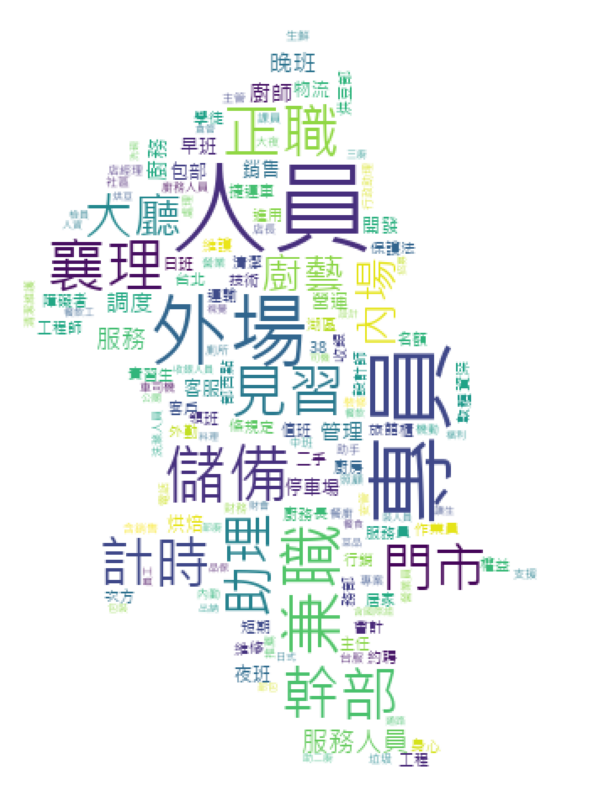

In [49]:
#顯示圖片
plt.figure(figsize=(10,10)) # 調圖片的大小
plt.imshow(wordcloud)
plt.axis("off") # 關閉圖形座標軸
plt.show()